この問題は、リソースの消費を平均80%以内にするための物理サーバの必要台数を計算するものです。問題の解説にあるように、物理サーバが8台停止してもリソース消費が80%以内に収まる条件を満たすための台数を求めるための公式が使われています。

問題の条件から次のように式を導きます。

### 解説

1. **平常時のリソース消費:**
   - 平常時の物理サーバの台数を \( N \) 台とする。
   - 平常時のリソース消費は60%なので、消費リソースは \( 0.6N \)。

2. **物理サーバが8台停止した場合:**
   - 停止後の物理サーバの台数は \( N-8 \) 台。
   - 80%以内に抑えるためのリソース消費は \( 0.8(N-8) \)。

3. **リソースの再配分:**
   - 停止後の稼働中のサーバにリソースが均等に再配分されるため、次の等式が成立します。
   \[
   0.6N = 0.8(N - 8)
   \]

4. **等式の解:**
   - 上記の等式を解くことで必要な物理サーバの台数 \( N \) を求めます。
   \[
   0.6N = 0.8N - 6.4
   \]
   \[
   0.6N - 0.8N = -6.4
   \]
   \[
   -0.2N = -6.4
   \]
   \[
   N = 32
   \]

### 結論
物理サーバが1台も停止していないときの最低台数は32台です。この解を基に、選択肢の中で正しい答えは「ア 32」となります。

以上の計算を元にして、必要な物理サーバの台数を求めることができます。

In [6]:
import numpy as np

for _ in range(10):
    print(np.random.rand() * 10)

6.241085016069416
4.498714782464683
8.597776156696817
5.207939301696566
5.542405480248166
8.562762435313148
0.3256940526641894
5.6674627918473774e-05
3.785764973048713
6.91797919906326


In [7]:
from sqlalchemy import create_engine, Column, Integer, String, Float, MetaData, Table
from sqlalchemy.orm import sessionmaker

# メモリ内のSQLiteデータベースを作成
engine = create_engine('sqlite:///example.db')
metadata = MetaData()

# テーブルの定義
olap_table = Table('olap', metadata,
    Column('id', Integer, primary_key=True),
    Column('year', Integer),
    Column('region', String),
    Column('category', String),
    Column('sales', Float)
)

# テーブルの作成
metadata.create_all(engine)

# セッションの作成
Session = sessionmaker(bind=engine)
session = Session()

# サンプルデータの挿入
sample_data = [
    {'year': 2021, 'region': 'North', 'category': 'Electronics', 'sales': 1000.0},
    {'year': 2021, 'region': 'South', 'category': 'Electronics', 'sales': 1500.0},
    {'year': 2021, 'region': 'North', 'category': 'Furniture', 'sales': 700.0},
    {'year': 2021, 'region': 'South', 'category': 'Furniture', 'sales': 800.0},
    {'year': 2022, 'region': 'North', 'category': 'Electronics', 'sales': 1100.0},
    {'year': 2022, 'region': 'South', 'category': 'Electronics', 'sales': 1600.0},
    {'year': 2022, 'region': 'North', 'category': 'Furniture', 'sales': 750.0},
    {'year': 2022, 'region': 'South', 'category': 'Furniture', 'sales': 850.0},
]

# データを挿入
session.execute(olap_table.insert(), sample_data)
session.commit()

- pandasでの処理

In [8]:
import pandas as pd

# データベースからデータを取得
df = pd.read_sql_table('olap', con=engine)

# データの表示
print("Data using pandas:")
print(df)

# ロールアップ: 年ごとの売上を集計
rollup_df = df.groupby('year')['sales'].sum().reset_index()
print("\nRoll-up using pandas:")
print(rollup_df)

Data using pandas:
   id  year region     category   sales
0   1  2021  North  Electronics  1000.0
1   2  2021  South  Electronics  1500.0
2   3  2021  North    Furniture   700.0
3   4  2021  South    Furniture   800.0
4   5  2022  North  Electronics  1100.0
5   6  2022  South  Electronics  1600.0
6   7  2022  North    Furniture   750.0
7   8  2022  South    Furniture   850.0

Roll-up using pandas:
   year   sales
0  2021  4000.0
1  2022  4300.0


In [10]:
!pip install polars
!pip install --upgrade pip


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


- Polarsの場合

In [13]:
import polars as pl

# Polarsを使ってデータベースからデータを読み込む
query = "SELECT * FROM olap"
df_polars = pl.read_database(query=query, connection=engine.connect())

# データの表示
print("Data using polars:")
df_polars

Data using polars:


id,year,region,category,sales
i64,i64,str,str,f64
1,2021,"""North""","""Electronics""",1000.0
2,2021,"""South""","""Electronics""",1500.0
3,2021,"""North""","""Furniture""",700.0
4,2021,"""South""","""Furniture""",800.0
5,2022,"""North""","""Electronics""",1100.0
6,2022,"""South""","""Electronics""",1600.0
7,2022,"""North""","""Furniture""",750.0
8,2022,"""South""","""Furniture""",850.0


In [19]:
import polars as pl

# サンプルデータの作成
data = {
    "year": [2021, 2021, 2022, 2022],
    "region": ["North", "South", "North", "South"],
    "sales": [1000.0, 1500.0, 1100.0, 1600.0]
}

# DataFrameの作成
df = pl.DataFrame(data)

# DataFrameをLazyFrameに変換
lazy_df = df.lazy()

# グループ化と集約操作を遅延評価で定義
rollup_df = (
    lazy_df
    .group_by("year")
    .agg(pl.col("sales").sum().alias("total_sales"))
)

# 結果を収集（実行）
result = rollup_df.collect()

result

year,total_sales
i64,f64
2021,2500.0
2022,2700.0


In [20]:
# Polarsを使ってデータベースからデータを読み込む
query = "SELECT * FROM olap"
df_polars = pl.read_database(query=query, connection=engine.connect())

# データの表示
print("Data using polars:")
print(df_polars)

# DataFrameをLazyFrameに変換
lazy_df = df_polars.lazy()

# グループ化と集約操作を遅延評価で定義
rollup_df = (
    lazy_df
    .group_by("year")
    .agg(pl.col("sales").sum().alias("total_sales"))
)

# 結果を収集（実行）
result = rollup_df.collect()

print("\nRoll-up using polars:")
print(result)

Data using polars:
shape: (8, 5)
┌─────┬──────┬────────┬─────────────┬────────┐
│ id  ┆ year ┆ region ┆ category    ┆ sales  │
│ --- ┆ ---  ┆ ---    ┆ ---         ┆ ---    │
│ i64 ┆ i64  ┆ str    ┆ str         ┆ f64    │
╞═════╪══════╪════════╪═════════════╪════════╡
│ 1   ┆ 2021 ┆ North  ┆ Electronics ┆ 1000.0 │
│ 2   ┆ 2021 ┆ South  ┆ Electronics ┆ 1500.0 │
│ 3   ┆ 2021 ┆ North  ┆ Furniture   ┆ 700.0  │
│ 4   ┆ 2021 ┆ South  ┆ Furniture   ┆ 800.0  │
│ 5   ┆ 2022 ┆ North  ┆ Electronics ┆ 1100.0 │
│ 6   ┆ 2022 ┆ South  ┆ Electronics ┆ 1600.0 │
│ 7   ┆ 2022 ┆ North  ┆ Furniture   ┆ 750.0  │
│ 8   ┆ 2022 ┆ South  ┆ Furniture   ┆ 850.0  │
└─────┴──────┴────────┴─────────────┴────────┘

Roll-up using polars:
shape: (2, 2)
┌──────┬─────────────┐
│ year ┆ total_sales │
│ ---  ┆ ---         │
│ i64  ┆ f64         │
╞══════╪═════════════╡
│ 2021 ┆ 4000.0      │
│ 2022 ┆ 4300.0      │
└──────┴─────────────┘


In [7]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, select
from sqlalchemy.orm import sessionmaker
import pandas as pd

# メモリ上のSQLiteデータベースを作成
engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

# サンプルのテーブルを作成
sample_table = Table(
    'sample_table', metadata,
    Column('id', Integer, primary_key=True),
    Column('data', String)
)

metadata.create_all(engine)

# 接続を作成
connection = engine.connect()
Session = sessionmaker(bind=connection)
session = Session()

# データの挿入
connection.execute(sample_table.insert(), [
    {'id': 1, 'data': 'データ1'},
    {'id': 2, 'data': 'データ2'},
    {'id': 3, 'data': 'データ3'}
])

# トランザクションの開始
session.begin()

try:
    # データの更新
    session.execute(
        sample_table.update().where(sample_table.c.id == 1).values(data='更新されたデータ1')
    )
    session.commit()  # トランザクションのコミット

    # トランザクションがコミットされた後にデータを読み込む
    result = connection.execute(select(sample_table))
    df = pd.DataFrame(result.fetchall(), columns=result.keys())
    print(df)
except:
    print('Rollback')
    session.rollback()  # ロールバック
finally:
    session.close()
    connection.close()

   id       data
0   1  更新されたデータ1
1   2       データ2
2   3       データ3


In [9]:
from sqlalchemy import create_engine, Column, Integer, String, Date, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship
from datetime import date
import pandas as pd

Base = declarative_base()

class Item(Base):
    __tablename__ = 'items'
    id = Column(Integer, primary_key=True)
    name = Column(String)

class Warehouse(Base):
    __tablename__ = 'warehouses'
    id = Column(Integer, primary_key=True)
    address = Column(String)

class InventoryItem(Base):
    __tablename__ = 'inventory_items'
    id = Column(Integer, primary_key=True)
    item_id = Column(Integer, ForeignKey('items.id'))
    warehouse_id = Column(Integer, ForeignKey('warehouses.id'))
    quantity = Column(Integer)
    item = relationship('Item')
    warehouse = relationship('Warehouse')

class InventoryTransaction(Base):
    __tablename__ = 'inventory_transactions'
    id = Column(Integer, primary_key=True)
    transaction_number = Column(Integer)
    transaction_date = Column(Date)
    posting_date = Column(Date)
    quantity_moved = Column(Integer)
    source_id = Column(Integer, ForeignKey('inventory_items.id'))
    destination_id = Column(Integer, ForeignKey('inventory_items.id'))
    source = relationship('InventoryItem', foreign_keys=[source_id])
    destination = relationship('InventoryItem', foreign_keys=[destination_id])

# メモリ上にSQLiteデータベースを作成
engine = create_engine('sqlite:///:memory:')
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

# データの追加
item = Item(name='Item A')
warehouse1 = Warehouse(address='Location 1')
warehouse2 = Warehouse(address='Location 2')
inventory1 = InventoryItem(item=item, warehouse=warehouse1, quantity=100)
inventory2 = InventoryItem(item=item, warehouse=warehouse2, quantity=50)

session.add_all([item, warehouse1, warehouse2, inventory1, inventory2])
session.commit()

# 在庫取引の追加
transaction = InventoryTransaction(
    transaction_number=1,
    transaction_date=date(2023, 7, 23),
    posting_date=date(2023, 7, 23),
    quantity_moved=10,
    source=inventory1,
    destination=inventory2
)
session.add(transaction)
session.commit()

# データの確認
inventory_items = session.query(InventoryItem).all()
transactions = session.query(InventoryTransaction).all()

inventory_df = pd.DataFrame([(i.id, i.item.name, i.warehouse.address, i.quantity) for i in inventory_items],
                            columns=['ID', 'Item', 'Warehouse', 'Quantity'])
transaction_df = pd.DataFrame([(t.id, t.transaction_number, t.transaction_date, t.posting_date, t.quantity_moved, t.source_id, t.destination_id) for t in transactions],
                              columns=['ID', 'Transaction Number', 'Transaction Date', 'Posting Date', 'Quantity Moved', 'Source ID', 'Destination ID'])

print("Inventory Items:")
print(inventory_df)
print("\nInventory Transactions:")
print(transaction_df)

Inventory Items:
   ID    Item   Warehouse  Quantity
0   1  Item A  Location 1       100
1   2  Item A  Location 2        50

Inventory Transactions:
   ID  Transaction Number Transaction Date Posting Date  Quantity Moved  \
0   1                   1       2023-07-23   2023-07-23              10   

   Source ID  Destination ID  
0          1               2  


/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_8730/1311944584.py:7: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [10]:
# 毎秒
print(f"1秒毎に{20*10}キロバイト")

mb_to_kb =  10**3
print(f"1MBは{mb_to_kb}キロバイト")

1秒毎に200キロバイト
1MBは1000キロバイト


In [13]:
db_buffer = 480 * mb_to_kb
print(f"dbの1時間のバッファアーカイブ回数は{(60*60) / (db_buffer / 200)}回")

log_buffer = 240 * mb_to_kb
print(f"logファイルの1時間のアーカイブ回数は{(60*60) / (log_buffer / 200)}回")

dbの1時間のバッファアーカイブ回数は1.5回
logファイルの1時間のアーカイブ回数は3.0回


In [19]:
import re

pattern = r"enjoy"
text = "enjoy data science"
matchOB = re.match(pattern, text)
if matchOB:
    print(matchOB.group())

enjoy


In [1]:
# サンプルの集合 R と S
R = {1, 2, 3, 4}
S = {3, 4, 5, 6}

# R ∩ S
intersection = R & S

# a. (R - S) - (S - R)
a = (R - S) - (S - R)
print("a: ", a == intersection)

# b. R - (R - S)
b = R - (R - S)
print("b: ", b == intersection)

# c. R - (S - R)
c = R - (S - R)
print("c: ", c == intersection)

# d. S - (R - S)
d = S - (R - S)
print("d: ", d == intersection)

a:  False
b:  True
c:  False
d:  False


In [2]:
intersection

{3, 4}

In [1]:
import pandas as pd


df = pd.DataFrame([[15, "a", True], [20, "b", False], [10, "c", False]])
df.index = ["01", "02", "03"]
df.columns = ["A", "B", "C"]
df

,A,B,C
01,15,a,True
02,20,b,False
03,10,c,False


In [3]:
df.iloc[2,0]

10

In [4]:
df.loc["03", "A"]

10

In [5]:
def max_records(k, n):
    return (2 * k + 1) ** n - 1

# 例えば、k = 2, n = 3 の場合
k = 2
n = 3
print(f"最大のレコード数は: {max_records(k, n)}個です")

最大のレコード数は: 124個です


In [6]:
log_data = 20 * 10
print(f"ログ長は{log_data}KBです")

ログ長は200KBです


In [7]:
db_buffer = 480 * 1000
log_buffer = 240 * 1000
print(f"DBバッファは{db_buffer}KBです。")
print(f"logバッファは{log_buffer}KBです。")

DBバッファは480000KBです。
logバッファは240000KBです。


In [8]:
hour_to_sec = 60*60
hour_to_sec

3600

In [12]:
log_buffer / log_data

1200.0

In [13]:
3600 / 1200

3.0

In [14]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, ForeignKey

engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

# A表の定義
table_a = Table('A', metadata,
    Column('a', Integer, primary_key=True),
    Column('name', String)
)

# B表の定義
table_b = Table('B', metadata,
    Column('b', Integer, primary_key=True),
    Column('a', Integer, ForeignKey('A.a')),  # 1対1の関係を示す
    Column('description', String)
)

metadata.create_all(engine)

In [16]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, ForeignKey

# データベースエンジンの作成
engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

# A表 (社員情報) の定義
table_a = Table('A', metadata,
    Column('a', Integer, primary_key=True),
    Column('name', String)
)

# B表 (社員詳細情報) の定義
table_b = Table('B', metadata,
    Column('b', Integer, primary_key=True),
    Column('a', Integer, ForeignKey('A.a')),  # 1対1の関係を示す外部キー
    Column('description', String)
)

# テーブルの作成
metadata.create_all(engine)

# サンプルデータの挿入
with engine.connect() as conn:
    conn.execute(table_a.insert(), [
        {'a': 1, 'name': '田中'},
        {'a': 2, 'name': '鈴木'}
    ])
    conn.execute(table_b.insert(), [
        {'b': 101, 'a': 1, 'description': '田中の詳細情報'},
        {'b': 102, 'a': 2, 'description': '鈴木の詳細情報'}
    ])

    # データの確認
    result_a = conn.execute(table_a.select()).fetchall()
    result_b = conn.execute(table_b.select()).fetchall()
    print(result_a)
    print(result_b)

[(1, '田中'), (2, '鈴木')]
[(101, 1, '田中の詳細情報'), (102, 2, '鈴木の詳細情報')]


In [17]:
# 物理サーバーの計算
# 0.6n = 0.8(n-8)
n = 6.4 / 0.2
print(n)

32.0


In [18]:
import pandas as pd

# Example data
data_r = {
    "Name": ["Alice", "Bob"],
    "Age": [25, 30]
}

data_s = {
    "Product": ["Book", "Pen"],
    "Price": [15, 2]
}

# Create DataFrames for R and S
df_r = pd.DataFrame(data_r)
df_s = pd.DataFrame(data_s)

# Perform Cartesian Product (Cross Join)
cartesian_product = df_r.merge(df_s, how='cross')

# Display the result
print(cartesian_product)

    Name  Age Product  Price
0  Alice   25    Book     15
1  Alice   25     Pen      2
2    Bob   30    Book     15
3    Bob   30     Pen      2


In [19]:
import polars as pl

# サンプルデータの作成
tbl1 = pl.DataFrame({
    "COL1": ["新宿", "渋谷", "上野", "池袋"]
})

tbl2 = pl.DataFrame({
    "COL1": ["新宿", "渋谷"]
})

# EXISTS句の実行
result = tbl1.filter(pl.col("COL1").is_in(tbl2["COL1"]))
print(result)

shape: (2, 1)
┌──────┐
│ COL1 │
│ ---  │
│ str  │
╞══════╡
│ 新宿 │
│ 渋谷 │
└──────┘


In [22]:
from sqlalchemy import create_engine, Column, String, Table, MetaData, select, distinct
from sqlalchemy.orm import sessionmaker

# メモリ上のSQLiteデータベースを作成
engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

# TBL1とTBL2のテーブル定義
tbl1 = Table('TBL1', metadata,
             Column('COL1', String, primary_key=True))

tbl2 = Table('TBL2', metadata,
             Column('COL1', String, primary_key=True))

# テーブルを作成
metadata.create_all(engine)

# データの挿入
conn = engine.connect()
conn.execute(tbl1.insert().values([{'COL1': '新宿'}, {'COL1': '渋谷'}, {'COL1': '上野'}, {'COL1': '池袋'}]))
conn.execute(tbl2.insert().values([{'COL1': '新宿'}, {'COL1': '渋谷'}]))

# セッションの作成
Session = sessionmaker(bind=engine)
session = Session()

# SQLAlchemyでのクエリ実行
subquery = select(tbl2.c.COL1)
query = select(distinct(tbl1.c.COL1)).where(tbl1.c.COL1.in_(subquery))

# クエリの結果を取得
result = session.execute(query).fetchall()

# 結果の表示
for row in result:
    print(row.COL1)

# セッションの終了
session.close()
conn.close()

新宿
渋谷


In [24]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, select, text

# メモリ上のSQLiteデータベースを作成
engine = create_engine('sqlite:///:memory:', echo=True)
metadata = MetaData()

# 実表の定義
students = Table('students', metadata,
    Column('id', Integer, primary_key=True),
    Column('name', String),
    Column('grade', String)
)

# メモリ上にテーブルを作成
metadata.create_all(engine)

# データベースにデータを挿入
connection = engine.connect()
connection.execute(students.insert(), [
    {'name': 'Alice', 'grade': 'A'},
    {'name': 'Bob', 'grade': 'B'},
])

# ビューの定義（仮想的なもの）
view_name = 'v_students'
connection.execute(text(f"CREATE VIEW {view_name} AS SELECT id, name FROM students WHERE grade = 'A'"))

# ビューへのクエリ
result = connection.execute(text(f"SELECT id, name FROM {view_name}"))
for row in result:
    print(row)

# 接続を閉じる
connection.close()

2024-07-30 07:55:03,474 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-30 07:55:03,475 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("students")
2024-07-30 07:55:03,475 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-30 07:55:03,476 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("students")
2024-07-30 07:55:03,476 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-30 07:55:03,476 INFO sqlalchemy.engine.Engine 
CREATE TABLE students (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	grade VARCHAR, 
	PRIMARY KEY (id)
)


2024-07-30 07:55:03,477 INFO sqlalchemy.engine.Engine [no key 0.00018s] ()
2024-07-30 07:55:03,477 INFO sqlalchemy.engine.Engine COMMIT
2024-07-30 07:55:03,478 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-30 07:55:03,478 INFO sqlalchemy.engine.Engine INSERT INTO students (name, grade) VALUES (?, ?)
2024-07-30 07:55:03,478 INFO sqlalchemy.engine.Engine [generated in 0.00070s] [('Alice', 'A'), ('Bob', 'B')]
2024-07-30 07:55:03,479 INFO sqlalchemy.e

In [3]:
from sqlalchemy import create_engine, Table, Column, String, Integer, MetaData, text
import polars as pl

# メモリ上にSQLiteデータベースを作成
engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

# テーブルを定義
商品 = Table('商品', metadata,
    Column('商品コード', String, primary_key=True),
    Column('仕入先コード', String)
)

当月商品仕入れ合計 = Table('当月商品仕入れ合計', metadata,
    Column('仕入先コード', String, primary_key=True),
    Column('仕入合計金額', Integer)
)

# テーブルを作成
metadata.create_all(engine)

# データを挿入し、クエリを実行
with engine.connect() as conn:
    # データを挿入
    conn.execute(商品.insert(), [
        {'商品コード': 'S001', '仕入先コード': 'K01'},
        {'商品コード': 'S002', '仕入先コード': 'K01'},
        {'商品コード': 'S003', '仕入先コード': 'K02'},
        {'商品コード': 'S004', '仕入先コード': 'K02'},
        {'商品コード': 'S005', '仕入先コード': 'K03'},
        {'商品コード': 'S006', '仕入先コード': 'K04'}
    ])
    conn.execute(当月商品仕入れ合計.insert(), [
        {'仕入先コード': 'K01', '仕入合計金額': 150000},
        {'仕入先コード': 'K03', '仕入合計金額': 100000},
        {'仕入先コード': 'K05', '仕入合計金額': 250000}
    ])

    # SQLクエリを実行
    result = conn.execute(text("""
        SELECT 仕入先コード FROM 商品
        EXCEPT
        SELECT 仕入先コード FROM 当月商品仕入れ合計
    """))
    
    # 結果をPolars DataFrameに変換
    rows = result.fetchall()
    df = pl.DataFrame({"仕入先コード": [row[0] for row in rows]})
    print(df)

# 出力:
# shape: (2, 1)
# ┌──────────────┐
# │ 仕入先コード │
# │ ---          │
# │ str          │
# ╞══════════════╡
# │ K02          │
# │ K04          │
# └──────────────┘

shape: (2, 1)
┌──────────────┐
│ 仕入先コード │
│ ---          │
│ str          │
╞══════════════╡
│ K02          │
│ K04          │
└──────────────┘


In [5]:
from sqlalchemy import create_engine, Table, Column, String, Integer, MetaData

# メモリ上にSQLiteデータベースを作成
engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

# 社員テーブルを定義
社員 = Table('社員', metadata,
    Column('社員番号', Integer, primary_key=True),
    Column('部門名', String),
    Column('社員名', String),
    Column('役割名', String)
)

# テーブルを作成
metadata.create_all(engine)

# データを挿入し、クエリを実行
with engine.connect() as conn:
    conn.execute(社員.insert(), [
        {'社員番号': 1, '部門名': '開発', '社員名': '山田', '役割名': 'プログラマ'},
        {'社員番号': 2, '部門名': '開発', '社員名': '佐藤', '役割名': 'プログラマ'},
        {'社員番号': 3, '部門名': '開発', '社員名': '鈴木', '役割名': 'プログラマ'},
        {'社員番号': 4, '部門名': '販売', '社員名': '田中', '役割名': 'セールス'},
        {'社員番号': 5, '部門名': '販売', '社員名': '伊藤', '役割名': 'プログラマ'},
        {'社員番号': 6, '部門名': '管理', '社員名': '中村', '役割名': '管理職'}
    ])
   
    # 正しいSQL文でクエリを実行
    result = conn.execute(text("""
    SELECT 部門名 FROM 社員
    WHERE 役割名 = 'プログラマ'
    GROUP BY 部門名
    HAVING COUNT(*) >= 3;
    """)).fetchall()
   
    print(result)  # 正しい結果: [('開発',)]

[('開発',)]


In [7]:
import numpy as np


arr = np.array([[1, 1, 1], [3, 3, 3]])

In [8]:
arr.mean(axis=0)

array([2., 2., 2.])

In [9]:
arr.mean(axis=1)

array([1., 3.])

51.53 - 55.62 2.0
55.62 - 59.70 3.0
59.70 - 63.78 6.0
63.78 - 67.86 7.0
67.86 - 71.94 16.0
71.94 - 76.02 29.0
76.02 - 80.11 37.0
80.11 - 84.19 65.0
84.19 - 88.27 57.0
88.27 - 92.35 90.0
92.35 - 96.43 105.0
96.43 - 100.51 115.0
100.51 - 104.59 116.0
104.59 - 108.68 78.0
108.68 - 112.76 74.0
112.76 - 116.84 77.0
116.84 - 120.92 42.0
120.92 - 125.00 41.0
125.00 - 129.08 21.0
129.08 - 133.17 10.0
133.17 - 137.25 4.0
137.25 - 141.33 2.0
141.33 - 145.41 2.0
145.41 - 149.49 0.0
149.49 - 153.57 1.0


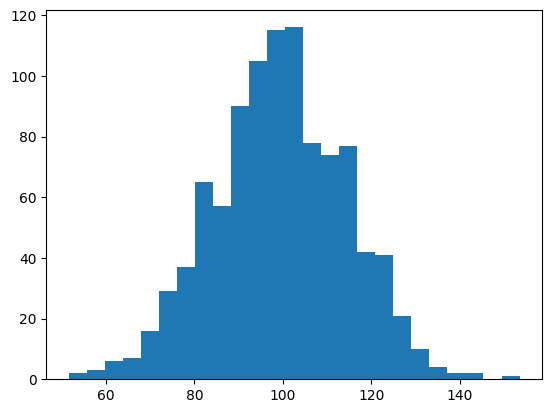

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
mu = 100
sigma = 15
x = np.random.normal(mu, sigma, 1000)
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, bins=25)

for i, num in enumerate(n):
    print('{:.2f} - {:.2f} {}'.format(bins[i], bins[i + 1], num))

plt.show()